# Notebook d'aide/correction pour la séance EPU MAM4 Biomaths (suite 2)

*séance du 21/03/2022*

*Ludovic Mailleret, Mars 2022*

## Populations exploitées : la tordeuse du bourgeon de l'épinette

### Population d'oiseaux constante

Nous considérons le modèle de dynamique de populations suivant, inspiré de [(Ludwig, Jones et Holling, 1978)](https://jmahaffy.sdsu.edu/courses/f09/math636/lectures/bifurcation_ode/ludwig_ecology_78.pdf):

$$
\dot x =rx\left(1-\frac{x}{K}\right) - \frac{\alpha x^2}{h^2+x^2}\ y
$$

Il n'y a pas de difficulté particulière à la simulation.

In [1]:
# on nettoie l'espace de travail et on reload les modules
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# simulation proprement dite
# densité initiale de la population
x0 = 10

# encapsulation de la densité initiale
etat0_tordeuse_yc = np.array([x0])

# définition d'un vecteur tspan pour tracer E_varie()
t_0 = 0             # temps initial
t_fin = 30.0        # temps final
pas_t = 0.01        # pas de temps de récupération des variables entre t_0 et t_fin

# définition du tspan 
tspan = np.arange(t_0, t_fin, pas_t)

# paramètres du modèle
r = 5.0
K = 10.0
alpha = 1.0
h = 0.5
y_const = 7.0

# encapsulation des paramètres dans un array
params_tordeuse_yc = np.array([r, K, alpha, h, y_const])

# définition du modèle tordeuse avec pop oiseaux constante
def modele_tordeuse_yc(etat, t, params): 
    x = etat              # on recupere l'etat
    r, K, alpha, h, y_const = params     # on récupère les paramètres
    xdot = r*x*(1-x/K) - alpha*(x**2)*y_const/((h**2)+(x**2))    # la derivee 
    return xdot           # on renvoie la derivée calculée

# intégration du modèle
int_tordeuse_yc = odeint(modele_tordeuse_yc, etat0_tordeuse_yc, tspan, args=(params_tordeuse_yc,), hmax=pas_t)


Pour le diagramme de bifurcation, on calcule le lieu des équilibres en fonction de la valeur de $y$ (constante).

In [2]:
# définition de deux vecteurs annexes y_plot et x_plot permettant le tracé et les calculs
y_plot = np.arange(0, 15, 0.01)   # pour le tracé de l'équilibre x=0
x_plot = np.arange(0.01, K, 0.01)   # pour le tracé des équilibres positifs

# valeurs de y correspondant aux équilibres positifs
y_eq = r*(1-x_plot/K) / (alpha*(x_plot)/((h**2)+(x_plot**2)))

Nous pouvons maintenant tracer $x$ en fonction du temps, le diagramme de bifurcation dans le plan $(y, x)$ ainsi que la représentation de la trajectoire dans ce même plan.

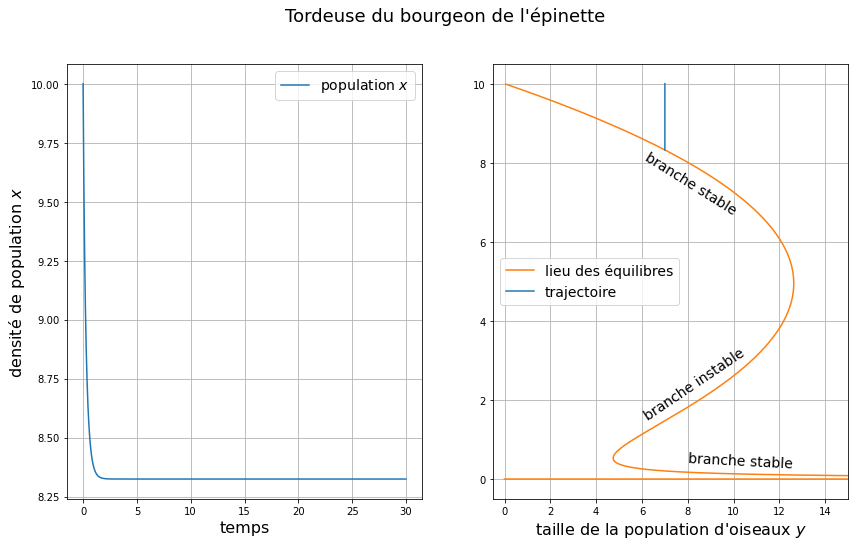

In [3]:
# création d'une figure, et de deux subplots (ax1, ax2)
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))  

# titre de la figure
fig1.suptitle("Tordeuse du bourgeon de l'épinette", va='top', fontsize='18')

# premier subplot
# tracé de x contre le temps
ax1.plot(tspan, int_tordeuse_yc, color = 'C0', label = "population $x$")

# labellisation des axes
ax1.set_xlabel('temps', fontsize='16')
ax1.set_ylabel('densité de population $x$', fontsize='16')

# légende
ax1.legend(fontsize='14')

# modification éventuelle des bornes des axes
ax1.set_ylim(bottom=None, top=None)

# ajout d'une grille
ax1.grid()


# second subplot
# tracé des lieux des équilibres
ax2.plot(y_plot, np.zeros_like(y_plot), color = 'C1')
ax2.plot(y_eq, x_plot, color='C1', label='lieu des équilibres')
# trajectoire simulée
ax2.plot(np.ones_like(int_tordeuse_yc)*y_const, int_tordeuse_yc, color = 'C0', label = 'trajectoire')

# légende
ax2.legend(fontsize='14')

# identification des branches stables et instables
ax2.text(6, 6.7, 'branche stable', rotation=-32, fontsize='14')
ax2.text(6, 1.5, 'branche instable', rotation=34, fontsize='14')
ax2.text(8, .3, 'branche stable', rotation=-3, fontsize='14')


# labellisation des axes
ax2.set_xlabel("taille de la population d'oiseaux $y$", fontsize='16')

# modification éventuelle des bornes des axes
ax2.set_ylim(bottom=None, top=None)
ax2.set_xlim(left = -.50, right = 15)

# ajout d'une grille
ax2.grid()

### Population d'oiseaux variable

Le changement principal ici est la dimension du modèle qui est de 2 puisque les tailles de populations de tordeuses $x$ et d'oiseaux $y$ varient toutes deux au cours du temps en s'influençant l'une l'autre. 

Le modèle prend la forme :		 			
$$ 
\left\{
\begin{array}{l}
\displaystyle \dot x = rx\left(1-\frac{x}{K}\right) - \frac{\alpha x^2}{h^2+x^2}\ y \\[.2cm]
\displaystyle \dot y = \varepsilon \left(\frac{n \alpha x^2}{h^2+x^2}\ y -m y\right)
\end{array}
\right.
$$

`odeint()` intègre sans problème ce type de système, il faut juste écrire correctement le système d'équations différentielle à passer à la fonction.

Nous définissons d'abord les conditions initiales et paramètres:

In [6]:
# densité initiale de la population
x0 = 1
y0 = 2.5

# encapsulation de la densité initiale
etat0_tordeuse_yvar = np.array([x0, y0])

# définition d'un vecteur tspan pour tracer E_varie()
t_0 = 0             # temps initial
t_fin = 400.0        # temps final, ici on prend un temps final long pour observer les dynamiques lentes
pas_t = 0.01        # pas de temps de récupération des variables entre t_0 et t_fin

# définition du tspan 
tspan = np.arange(t_0, t_fin, pas_t)

# paramètres du modèle
r = 5.0
K = 10.0
alpha = 1.0
h = 0.5
epsilon = 0.01
n = 5.0
m = 3.0

# encapsulation des paramètres dans un array
params_tordeuse_yvar = np.array([r, K, alpha, h, epsilon, n, m])

Puis nous définissons le modèle:

In [7]:
def modele_tordeuse_yvar(etat, t, params):
    x, y = etat                                         # recupere les variables d'etat
    r, K, alpha, h, epsilon, n, m = params      # recupere les parametres 
    etatdot = [r*x*(1 - x/K) - alpha*x**2/(h**2+x**2)*y,   # dot x
               epsilon*(n*alpha*x**2/(h**2+x**2)-m)*y]     # dot y

    return etatdot                                      # renvoie la derivee

Enfin, nous réalisons l'intégration d'une manière très similaire à ce que nous avons fait précédemment, si ce n'est que `odeint()` renvoit un `array` de 2 colonnes contenant les valeurs simulées de $x$ et $y$ le long de `tspan`.

In [8]:
# intégration du modèle
int_tordeuse_yvar = odeint(modele_tordeuse_yvar, etat0_tordeuse_yvar, tspan, args=(params_tordeuse_yvar,),
                           hmax=pas_t)

A priori tout semble s'être bien passé:

In [9]:
int_tordeuse_yvar


array([[ 1.        ,  2.5       ],
       [ 1.02540404,  2.50025497],
       [ 1.05163666,  2.50051974],
       ...,
       [ 7.25050962, 10.10111388],
       [ 7.24965237, 10.1031104 ],
       [ 7.24879465, 10.1051073 ]])

Représentons ces simulations graphiquement dans les espaces $(t,x)$ et $(y,x)$.

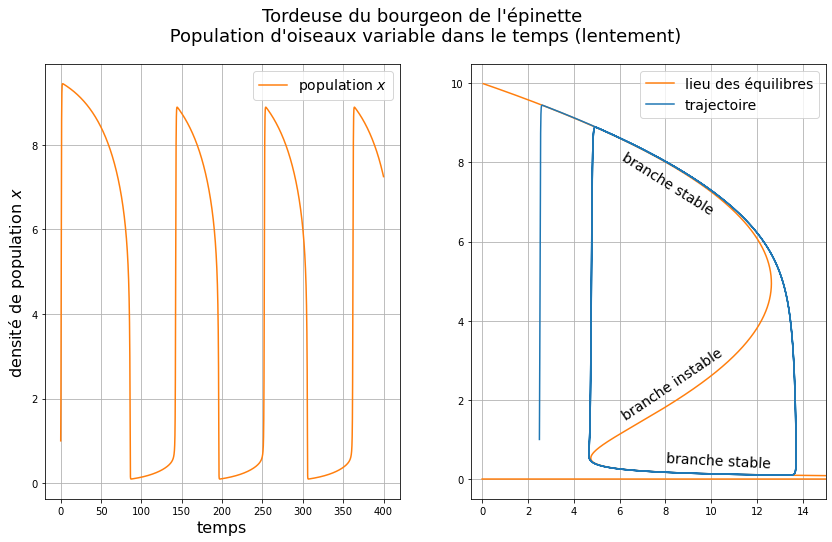

In [10]:
# création d'une figure, et de deux subplots
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 8))  

# titre de la figure
fig2.suptitle("Tordeuse du bourgeon de l'épinette\n Population d'oiseaux variable dans le temps (lentement)", 
              va='top', fontsize='18')

# premier subplot
# tracé de x contre le temps
ax3.plot(tspan, int_tordeuse_yvar[:, 0], color = 'C1', label = "population $x$")

# labellisation des axes
ax3.set_xlabel('temps', fontsize='16')
ax3.set_ylabel('densité de population $x$', fontsize='16')

# légende
ax3.legend(fontsize='14')

# modification éventuelle des bornes des axes
ax3.set_ylim(bottom=None, top=None)

# ajout d'une grille
ax3.grid()


# second subplot
# tracé des lieux des équilibres du modèle avec y constant
ax4.plot(y_plot, np.zeros_like(y_plot), color = 'C1')
ax4.plot(y_eq, x_plot, color='C1', label='lieu des équilibres')
# trajectoire simulée
ax4.plot(int_tordeuse_yvar[:, 1], int_tordeuse_yvar[:, 0], color = 'C0', label = 'trajectoire')

# légende
ax4.legend(fontsize='14')

# identification des branches stables et instables
ax4.text(6, 6.7, 'branche stable', rotation=-32, fontsize='14')
ax4.text(6, 1.5, 'branche instable', rotation=34, fontsize='14')
ax4.text(8, .3, 'branche stable', rotation=-3, fontsize='14')


# labellisation des axes
#ax2.set_xlabel("taille de la population d'oiseaux $y$", fontsize='16')

# modification éventuelle des bornes des axes
ax4.set_ylim(bottom=None, top=None)
ax4.set_xlim(left = -.50, right = 15)

# ajout d'une grille
ax4.grid()

La suite sur le modèle proies-prédateurs de Lotka Volterra, c'est par [ici](./biomaths_mam4_LV.ipynb)